### Logistic Regression

We have previously seen how linear regression works, that it works wells for predicting continous outputs that can be easily fit to a line.

However, Linear regression doesn't fare well for classification. This is where we use logistic regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Imported our libraries!")

Imported our libraries!


In [2]:
url = "http://bit.ly/wkspdata"

#we will use the titanic dataset for us to perform logistic regression
df = pd.read_csv(url)
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Data Pre-processing

In [4]:
dropcols = ["name", "ticket", "cabin"]
df = df.drop(dropcols, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df = df.dropna()#drop our null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
#pclass. sex and embarked are categorical features, we want to convert them into numeric
#this is so that our model be make use of them.
cat_features = ["pclass", "sex", "embarked"]
#one hot encoding
df = pd.get_dummies(df, columns=cat_features)
df.head()

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    712 non-null    int64  
 1   age         712 non-null    float64
 2   sibsp       712 non-null    int64  
 3   parch       712 non-null    int64  
 4   fare        712 non-null    float64
 5   pclass_1    712 non-null    uint8  
 6   pclass_2    712 non-null    uint8  
 7   pclass_3    712 non-null    uint8  
 8   sex_female  712 non-null    uint8  
 9   sex_male    712 non-null    uint8  
 10  embarked_C  712 non-null    uint8  
 11  embarked_Q  712 non-null    uint8  
 12  embarked_S  712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 38.9 KB


#### Extract our X and y, plus train test split

In [12]:
X = df.iloc[:,1:] #inputs
y = df.iloc[:,0] #output/target

In [14]:
from sklearn.model_selection import train_test_split

In [30]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=30)

### Now we do Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression #Step 1 : import logistic regression
log_reg = LogisticRegression(solver="newton-cg") #Step 2: instantiate our model
log_reg.fit(X_train, y_train)#Step 3: fit/train our model
print("Done training model!")

Done training model!


#### predicting from our trained model!

In [32]:
y_pred = log_reg.predict(X_test)# Step 4: model prediction
print(y_pred)

[1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0
 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0]


In [33]:
dict1 = {"Original Survived":y_test,"Predicted survived":y_pred}
df1 = pd.DataFrame(dict1)
df1.head(20)

,Original Survived,Predicted survived
194,1,1
130,0,0
844,0,0
870,0,0
99,0,0
675,0,0
662,0,0
222,0,0
641,1,1
606,0,0


### Model Evaluation
We are going import our metrics

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
test_acc = accuracy_score(y_test,y_pred) #Step 5: model evaluation
print("Accuracy Score : ", test_acc)

Accuracy Score :  0.7990654205607477


### Beyond Accuracy we can take a look at a few other metrics

In [37]:
cf_matrix = confusion_matrix(y_test,y_pred)

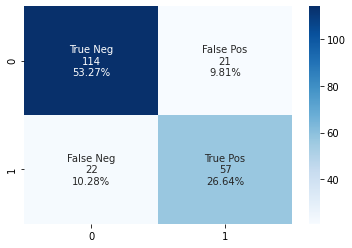

In [42]:
import seaborn as sns
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [44]:
pre_score = precision_score(y_test,y_pred)
print("Precision :", pre_score)

Precision : 0.7307692307692307


In [45]:
re_score = recall_score(y_test,y_pred)
print("Recall :", re_score)

Recall : 0.7215189873417721


### Exercise : Perform logistic regression on the iris dataset
* This is your y labels
> iris = datasets.load_iris()
>
> iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
>
> iris_target = iris.target      #this is your y!

In [46]:
#start with import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

print("Imported our libraries!")

Imported our libraries!


In [47]:
iris = datasets.load_iris()

#this is our X
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_target = iris.target #this is your y!

In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [48]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [49]:
#pre-process our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(iris_df, iris_target, test_size=0.3, 
                                                   random_state=30)

#### Perform logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression #Step 1 : import logistic regression
log_reg = LogisticRegression(solver="newton-cg") #Step 2: instantiate our model
log_reg.fit(X_train, y_train)#Step 3: fit/train our model
print("Done training model!")

Done training model!


In [51]:
y_pred = log_reg.predict(X_test)# Step 4: model prediction
print(y_pred)

[0 0 0 2 1 1 2 2 1 2 0 2 1 1 0 1 0 0 0 1 1 0 0 0 2 2 2 2 0 1 2 1 2 2 2 2 1
 2 1 2 2 2 0 1 2]


In [54]:
df1 = pd.DataFrame({"Org":y_test,"pred":y_pred})
df1

,Org,pred
0,0,0
1,0,0
2,0,0
3,2,2
4,1,1
5,1,1
6,2,2
7,2,2
8,1,1
9,2,2


In [55]:
from sklearn.metrics import  accuracy_score
test_acc = accuracy_score(y_test,y_pred) #Step 5: model evaluation
print("Accuracy Score : ", test_acc)

Accuracy Score :  0.9555555555555556


#### End of Logistic Regression workshop!